In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Strain Life 
#### Morrow equation
$$
\frac{\Delta \epsilon}{2} = \frac{\sigma'_f}{E}(2N_f)^b + \epsilon'_f(2N_f)^c
$$

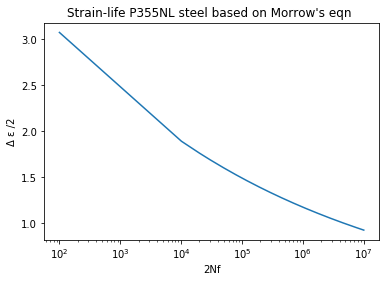

In [5]:
sigma_dash_f = 1005.5
b = - 0.1033
epsilon_dash_f = 0.3678
c = - 0.5475
E = 205.20

Nf = np.linspace(100,10000000,1000)
strain_amp = ((sigma_dash_f/E)*((Nf)**b)) + (epsilon_dash_f*((Nf)**c))

plt.ylabel('\u0394 \u03B5 /2')
plt.xscale('log')
plt.xlabel('2Nf')
plt.title("Strain-life P355NL steel based on Morrow's eqn ")

plt.plot(Nf,strain_amp)

## Determining the fatigue crack propogation curves 

$$
\frac{da}{dN} = C\Delta K^m
$$


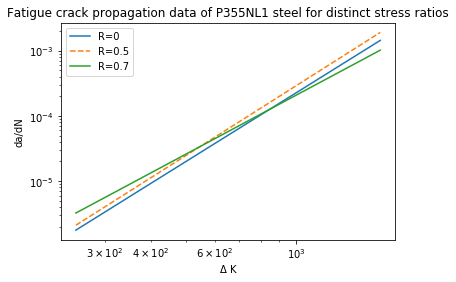

3009.3704004764686

In [70]:
C0 = 7.195e-15
m0 = 3.499

C05 = 6.281e-15
m05 = 3.555

C07 = 2.037e-13
m07 = 3.003

delta_k = np.linspace(250,1700,100)

da_dN0 = C0*(delta_k**m0)
da_dN05 = C05*(delta_k**m05)
da_dN07 = C07*(delta_k**m07)

plt.ylabel('da/dN')
plt.yscale('log')
plt.xlabel('\u0394 K')
plt.xscale('log')

plt.plot(delta_k,da_dN0,label='R=0')
plt.plot(delta_k,da_dN05,'--',label='R=0.5')
plt.plot(delta_k,da_dN07,label='R=0.7')
plt.legend()
plt.title('Fatigue crack propagation data of P355NL1 steel for distinct stress ratios')
plt.show()

Nf = np.linspace(100,10000000,100)


## Reversal Stress Ratio

$$
\frac{\Delta \sigma}{2} = \sigma_{max} = \sigma_f'(2N_f)^b 
$$

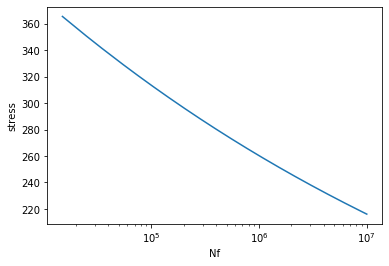

In [3]:
sigma = 840.50
b = -0.0808

Nf = np.linspace(15000,10000000,1000)
stress = sigma*((2*Nf)**b)


plt.xscale('log')
plt.plot(Nf,stress)
plt.xlabel('Nf')
plt.ylabel('stress')
plt.show()

## SWT-Nf
$$
\sigma_{max}\frac{\Delta\epsilon}{2} = \frac{(\sigma_f'^2)(2N_f)^{2b}}{E} + \sigma_f'\epsilon_f'(2N_f)^{b+c}
$$

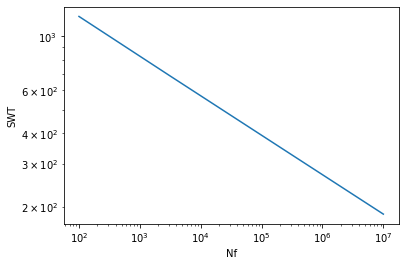

In [88]:
sigma = 840.50
b = -0.0808
epsilon = 0.3034
c = -0.6016
E = 250.20

Nf = np.linspace(100,10000000,10000)
r = np.random.normal(1,0.01,size=100)
SWT = ((sigma**2)*((2*Nf)**(2*b))/E) + (sigma*epsilon*((2*Nf)**(b+c)))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('SWT')
plt.xlabel('Nf')
plt.plot(Nf,SWT,'-')

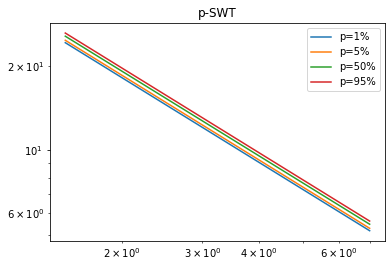

In [10]:
from scipy.special import gamma
from scipy.stats import weibull_min
import math

# create weibull random variable(x) given k

# ploting the histogram of the variable 

# plt.hist -> count,bins(points),ignored something
# bins form the points on which the graph is created as they are in ordered format
# pdf of X

class Weibull:
    '''
w = Weibull(shape:beta,scale:theta,position:lambda)

    '''
    def __init__(self,k,lmbda,delta):
        self.k = k
        self.lmbda = lmbda
        self.delta = delta
        self.x = (np.random.weibull(k,1000)*lmbda) + delta
        _,self.bins  = np.histogram(self.x,100,density=True)


    def pdf(self):
        x = self.bins
        k = self.k
        lmbda = self.lmbda
        delta =  self.delta
        return ((k/lmbda)*((x-delta)/lmbda)**(k-1))*(np.exp(-((x-delta)/lmbda)**k))

    def cdf(self):
        x = self.bins
        k = self.k
        lmbda = self.lmbda
        delta = self.delta
        return 1- np.exp(-((x-delta)/lmbda)**k)

    def failure_rate(self):
        x = self.x
        k = self.k
        lmbda = self.lmbda
        return (k/lmbda)*((x/lmbda)**(k-1))

    def E_x(self):
        k = self.k
        lmbda = self.lmbda
        return lmbda*(gamma(1+1/k))

    def var_x(self):
        k = self.k
        lmbda = self.lmbda
        return (lmbda**2)*(gamma(1+(2/k))-((gamma(1+(1/k)))**2))

    def plot_pdf(self):
        plt.plot(self.bins,self.pdf())
    
    def plot_cdf(self):
        plt.plot(self.bins,self.cdf())

    def plot_fr(self):
        plt.plot(self.bins,self.failure_rate())
    
    def plot_hist(self):
        plt.hist(self.x)

    def find_x(self,F_x):
        return (self.lmbda)*((math.log(1/(1-F_x)))**(1/self.k)) + self.delta
w = Weibull(25,12.887,25.5146)

plt.title("p-SWT")
#w.plot_cdf()
#x = (np.random.weibull(25,100)*12.887) + 25.5146

log_Nf = np.linspace(1.5,7,100)

log_SWT0 = w.find_x(0.01)/log_Nf
log_SWT1 = w.find_x(0.05)/log_Nf
log_SWT2 = w.find_x(0.5)/log_Nf
log_SWT3 = w.find_x(0.95)/log_Nf
log_SWT3 = w.find_x(0.99)/log_Nf

plt.xscale('log')
plt.yscale('log')
plt.plot(log_Nf,log_SWT0,label="p=1%")
plt.plot(log_Nf,log_SWT1,label="p=5%")
plt.plot(log_Nf,log_SWT2,label="p=50%")
plt.plot(log_Nf,log_SWT3,label="p=95%")

plt.legend()

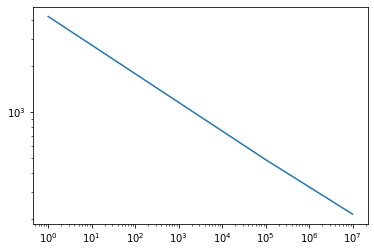

In [18]:
# SWT again
sigma_f = 952.20
epsilon_f = 0.7371
b = -0.0890
c = -0.6640
E = 211.60
Nf = np.linspace(1,10000000,100)

A = ((sigma_f)**2)*((2*Nf)**(2*b))
B = sigma_f*epsilon_f*((2*Nf)**(b+c))
SWT = A/E + B

plt.yscale('log')
plt.xscale('log')
plt.plot(Nf,SWT)

